### 0. Importing libraries, checking some basic characteristics of the dataset

In [54]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from collections import defaultdict
%matplotlib inline

In [2]:
customer_df = pd.read_csv('normd_encd.csv')
customer_df.head()

,Unnamed: 0,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,gender_M,response_Yes
0,0,7.924260,0,2,2011-02-24,4,10.937988,1,69,32,5,0,1,384.811147,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,8.850738,1,2,2011-01-31,2,10.693392,1,94,13,42,0,8,1131.464935,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,9.464008,2,2,2011-02-19,4,10.794809,1,108,18,38,0,2,566.472247,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,8.941920,0,2,2011-01-20,2,10.693392,1,106,18,65,0,7,529.881344,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,4,7.942253,0,2,2011-02-03,4,10.688211,0,73,12,44,0,1,138.130879,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [3]:
# time variable not useful for the analysis purposes of this exercise, it will be dropped from the dataframe
#time_v = customer_df['effective_to_date']
customer_df = customer_df.drop(['Unnamed: 0', 'effective_to_date'], axis = 1)

In [4]:
corr_m = customer_df.corr().round(2)
corr_m

,customer_lifetime_value,coverage,education,employmentstatus,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,gender_M,response_Yes
customer_lifetime_value,1.00,0.21,-0.02,0.04,0.01,0.00,0.42,0.00,-0.01,-0.03,0.21,0.22,-0.02,0.01,-0.00,0.01,-0.02,0.03,-0.04,-0.01,-0.01,0.00,0.00,-0.01,0.01,0.01,0.02,-0.08,0.00,-0.06,0.00,0.00,-0.02,0.14,0.15,0.23,0.12,-0.11,-0.01,-0.00
coverage,0.21,1.00,-0.02,0.00,-0.01,-0.02,0.45,0.01,0.00,-0.01,-0.01,0.26,0.00,0.00,0.02,-0.01,-0.00,-0.00,0.01,0.03,-0.02,-0.00,0.00,-0.00,0.01,0.01,-0.01,-0.03,-0.01,-0.03,0.01,-0.02,-0.02,-0.01,0.01,-0.01,0.01,-0.01,-0.01,-0.01
education,-0.02,-0.02,1.00,0.07,0.00,-0.02,-0.02,0.00,0.01,0.01,-0.01,-0.13,0.00,-0.00,-0.00,0.00,-0.01,0.04,-0.09,0.02,-0.02,0.02,0.00,0.00,-0.00,-0.01,-0.01,-0.01,0.01,-0.02,0.00,0.01,-0.00,-0.02,0.01,-0.01,-0.01,0.01,-0.01,0.03
employmentstatus,0.04,0.00,0.07,1.00,0.46,-0.02,-0.01,-0.00,-0.01,0.02,0.01,-0.31,-0.02,-0.00,0.01,-0.00,0.01,0.24,-0.25,0.02,0.01,-0.00,-0.01,0.00,-0.01,0.01,-0.00,0.13,0.04,0.08,0.01,0.03,-0.01,0.01,0.00,-0.03,-0.02,0.01,-0.01,-0.13
income,0.01,-0.01,0.00,0.46,1.00,-0.03,-0.01,-0.03,0.02,0.01,-0.00,-0.18,-0.01,-0.00,0.01,-0.00,0.01,0.05,-0.01,0.01,0.01,0.00,-0.02,0.00,-0.01,0.01,0.01,0.09,0.02,0.04,-0.00,0.01,0.00,0.02,-0.01,-0.01,-0.02,0.02,0.01,-0.10
location_code,0.00,-0.02,-0.02,-0.02,-0.03,1.00,0.00,-0.02,0.01,-0.02,0.00,0.27,-0.02,0.00,-0.01,-0.00,0.00,0.00,0.01,0.00,-0.02,-0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.00,-0.03,-0.01,-0.00,0.00,0.01,0.00,0.03,-0.02,-0.01,0.00,0.00
monthly_premium_auto,0.42,0.45,-0.02,-0.01,-0.01,0.00,1.00,-0.00,0.01,-0.01,0.00,0.60,-0.01,0.01,0.01,0.01,-0.02,-0.00,0.01,0.01,-0.01,0.00,-0.01,0.00,-0.00,0.01,-0.01,-0.07,-0.00,-0.04,0.00,-0.01,-0.00,0.43,0.47,0.43,0.22,-0.24,0.00,0.00
months_since_last_claim,0.00,0.01,0.00,-0.00,-0.03,-0.02,-0.00,1.00,-0.05,0.01,0.01,-0.00,0.00,-0.00,0.01,-0.01,0.01,0.02,-0.00,0.01,0.01,-0.00,0.00,-0.01,-0.02,0.00,0.01,0.01,-0.01,-0.01,0.01,0.01,-0.01,0.00,-0.01,-0.02,-0.00,0.01,0.02,-0.02
months_since_policy_inception,-0.01,0.00,0.01,-0.01,0.02,0.01,0.01,-0.05,1.00,-0.02,-0.01,-0.01,-0.00,-0.01,0.00,0.00,0.01,0.00,-0.02,0.00,-0.02,0.00,-0.00,0.01,-0.01,-0.01,0.00,-0.06,-0.01,-0.06,0.02,-0.02,0.00,0.02,0.00,-0.02,0.02,0.00,0.00,0.00
number_of_open_complaints,-0.03,-0.01,0.01,0.02,0.01,-0.02,-0.01,0.01,-0.02,1.00,0.00,-0.02,-0.00,0.01,0.01,-0.02,0.02,0.01,-0.01,-0.01,0.01,-0.01,0.01,0.00,-0.01,0.00,-0.01,-0.07,0.01,-0.04,0.00,0.01,-0.01,0.01,0.01,-0.01,-0.01,-0.01,-0.00,-0.02


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5]),
 [Text(0.5, 0, 'customer_lifetime_value'),
  Text(1.5, 0, 'coverage'),
  Text(2.5, 0, 'education'),
  Text(3.5, 0, 'employmentstatus'),
  Text(4.5, 0, 'income'),
  Text(5.5, 0, 'location_code'),
  Text(6.5, 0, 'monthly_premium_auto'),
  Text(7.5, 0, 'months_since_last_claim'),
  Text(8.5, 0, 'months_since_policy_inception'),
  Text(9.5, 0, 'number_of_open_complaints'),
  Text(10.5, 0, 'number_of_policies'),
  Text(11.5, 0, 'total_claim_amount'),
  Text(12.5, 0, 'vehicle_size'),
  Text(13.5, 0, 'state_California'),
  Text(14.5, 0, 'state_Nevada'),
  Text(15.5, 0, 'state_Oregon'),
  Text(16.5, 0, 'state_Washington'),
  Text(17.5, 0, 'marital_status_Married'),
  Text(18.5, 0, 'marital_status_Single'),
  Text(19.5, 0, 'p

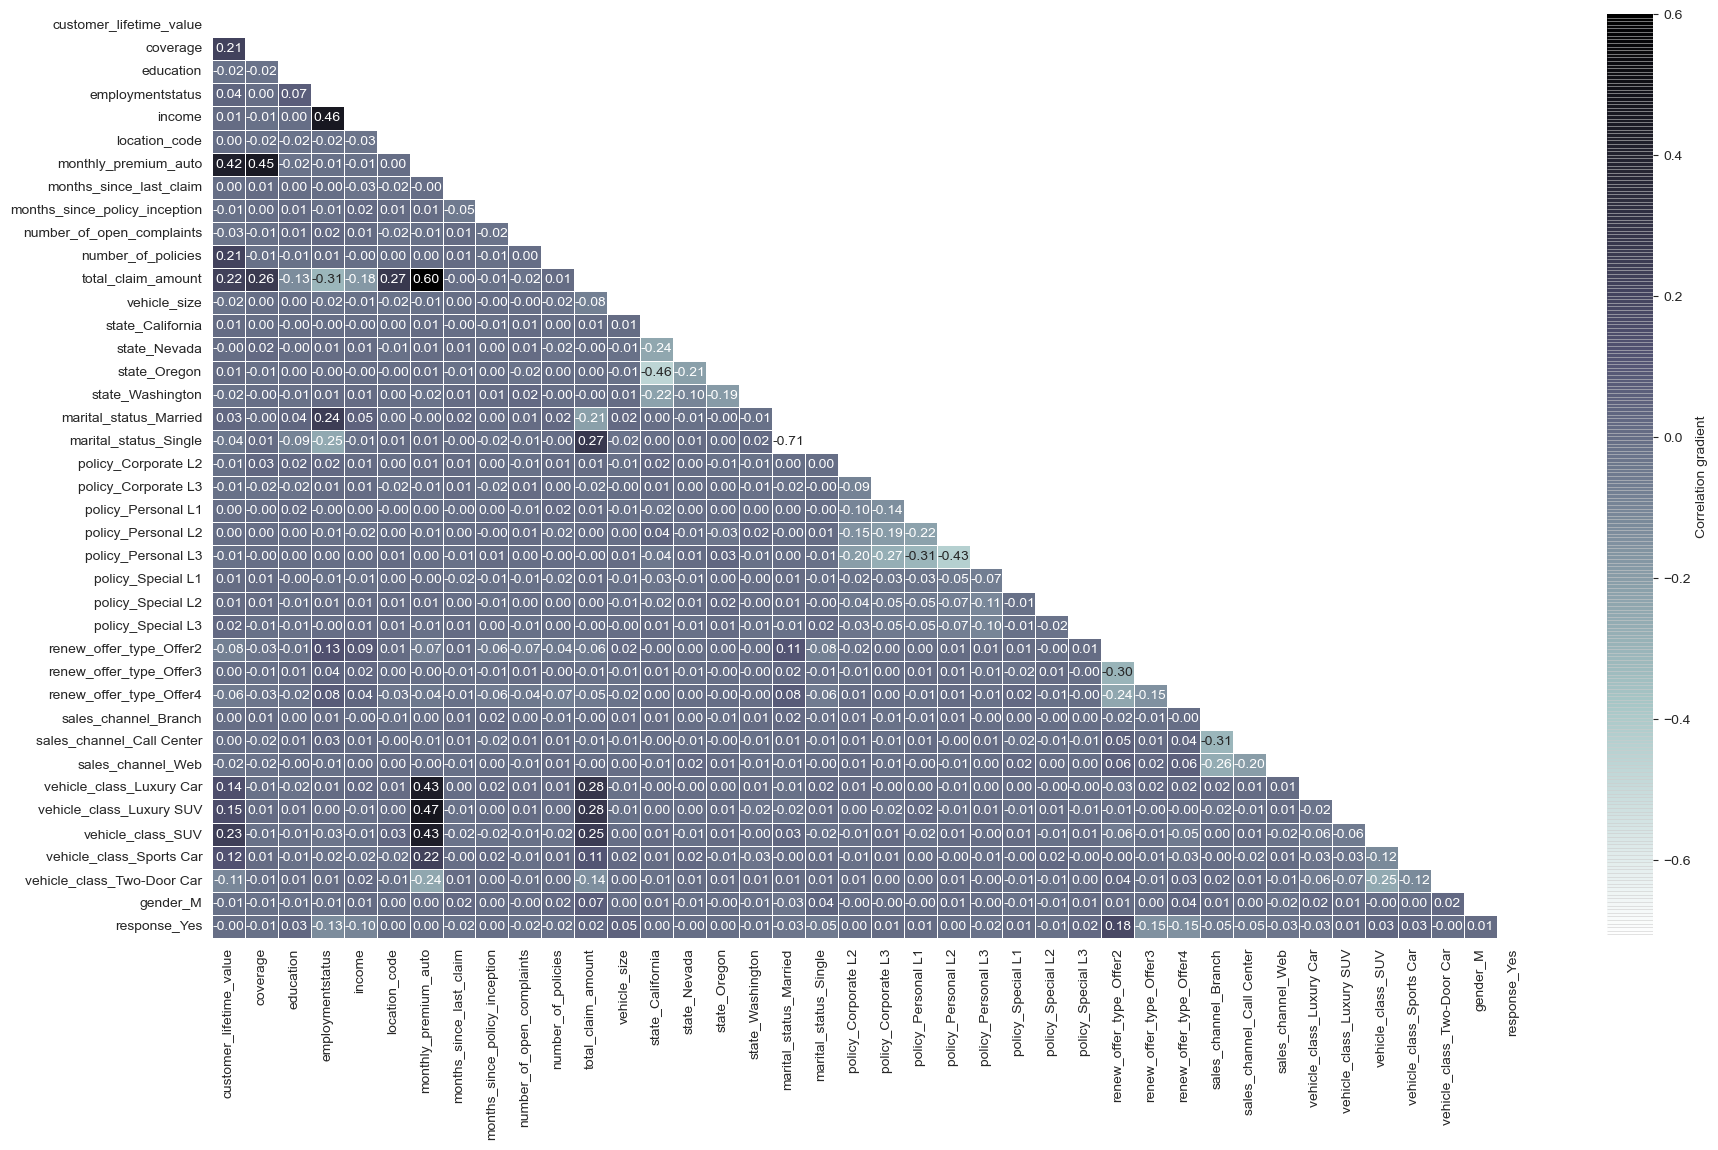

In [5]:
mask = np.zeros_like(corr_m)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (20, 12))
cm = sns.heatmap(corr_m, mask = mask, annot=True, fmt = '.2f', linewidth = .5, cmap = 'bone_r', cbar_kws = {'label': 'Correlation gradient', 'fraction' : .1, 'drawedges': True}) # cbar_kws arguments --> adaptation inspired by SEJAL KSHIRSAGAR's Customize Seaborn Heatmaps on kaggle
#cm.xaxis.tick_top()
plt.xticks(rotation = 90)

*High correlation between income/employmentstatus (0.7) and marital_status_Married/marital_status_Single (-0.71) observed.*
#### **No multicollinearity**

### 1. Train/test split

In [81]:
# X, y split
X = customer_df.drop('total_claim_amount', axis = 1)
y = customer_df['total_claim_amount']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

### 2. Trying a linear regression model

In [83]:
model = LinearRegression(n_jobs = -1)   # using all available processor units
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [84]:
lin_pred = model.predict(X_test)
r2_lin = r2_score(y_test, lin_pred)


In [85]:
RMSE_lin = mean_squared_error(y_test, lin_pred, squared=False)
MSE_lin = mean_squared_error(y_test, lin_pred)
MAE_lin = mean_absolute_error(y_test, lin_pred)
print("R2 = ", round(r2_lin, 2))
print("RMSE = ", round(RMSE_lin, 2))
print("MSE = ", round(MSE_lin, 2))
print("MAE = ", round(MAE_lin, 2))

R2 =  0.56
RMSE =  182.2
MSE =  33197.88
MAE =  134.96


In [86]:
y.describe().round(2)

count    9033.00
mean      426.47
std       274.16
min         0.10
25%       270.00
50%       379.20
75%       542.40
max      2201.33
Name: total_claim_amount, dtype: float64

### *Low r2 value and with RMSE = 182.2, MAE = 134.96 and mean = 426.47, the linear regression model is not particularly successful in predicting the total_claim_amount and its predictions have a big chance to be erroneous.*

<AxesSubplot:xlabel='total_claim_amount'>

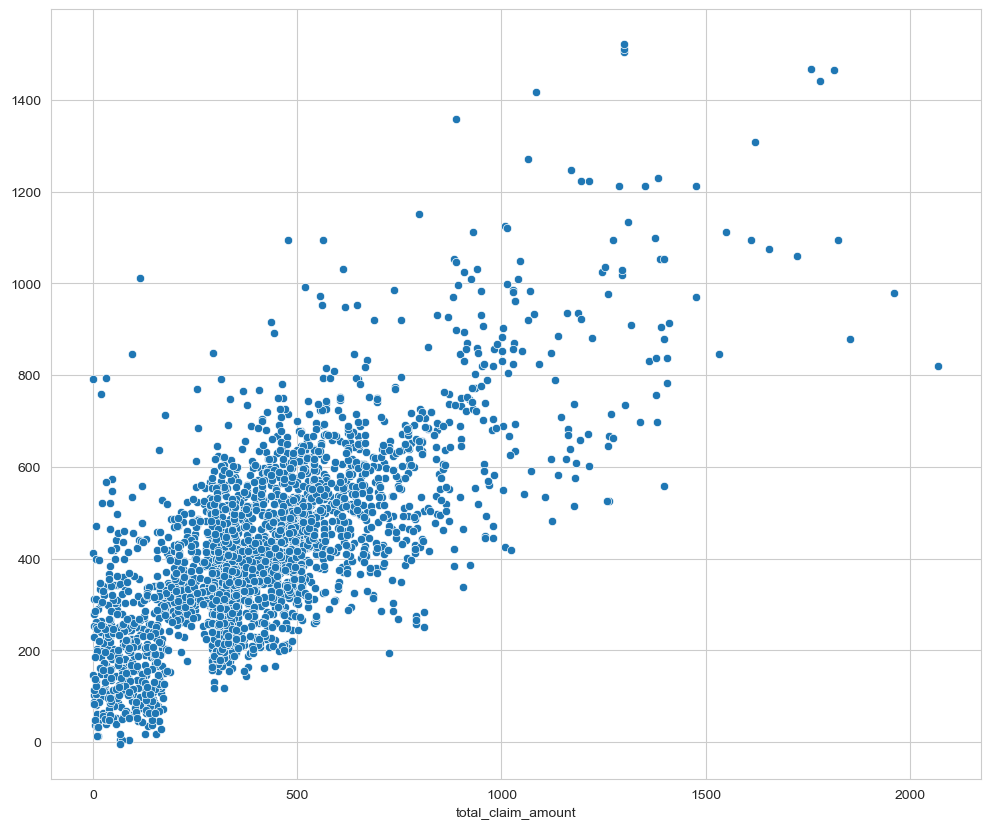

In [87]:
sns.scatterplot(y = lin_pred, x = y_test)

### 3. Defining function that compares models

In [154]:
def comp_models(range):
    score_by_neighbors = defaultdict(list)  # defining defaultdict to store data from both models for comparison as the r2 values of KNNregression model develop
    k_values = []
    for i in range:   # and now to add values to the dictionary:
        if  i == 2:
            model = KNeighborsRegressor(n_neighbors = i, weights = 'distance', n_jobs=-1)
            model.fit(X_train, y_train)
            score_by_neighbors['lin_regr_model'].append(round(r2_lin, 2))     # since there will only be one r2 value for the linear regression model, it will just be repeated to fill the gaps in the dictionary
            preds = model.predict(X_test)
            r2 = r2_score(y_test, preds)
            score_by_neighbors['knn_regr_model'].append(round(r2, 2))
            k_values.append(i)
        elif i<50 and i%5==0:
            model = KNeighborsRegressor(n_neighbors = i, weights = 'distance', n_jobs=-1)
            model.fit(X_train, y_train)
            score_by_neighbors['lin_regr_model'].append(round(r2_lin, 2))
            preds = model.predict(X_test)
            r2 = r2_score(y_test, preds)
            score_by_neighbors['knn_regr_model'].append(round(r2, 2))
            k_values.append(i)
        elif i >= 50 and i % 10 == 0:
            model = KNeighborsRegressor(n_neighbors = i, weights = 'uniform', n_jobs=-1)
            model.fit(X_train, y_train)
            score_by_neighbors['lin_regr_model'].append(round(r2_lin, 2))
            preds = model.predict(X_test)
            r2 = r2_score(y_test, preds)
            score_by_neighbors['knn_regr_model'].append(round(r2, 2))
            k_values.append(i)
    score_by_nbrs_df = pd.DataFrame(score_by_neighbors)
    plt.rcParams['figure.figsize'] = (12, 10)
    plt.plot(k_values, score_by_nbrs_df, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title("Comparison of Performance: Linear Regression vs. KNNeighbors")
    plt.xlabel("K")
    plt.ylabel("r2")
    plt.legend(score_by_nbrs_df.columns, loc = 'lower right')

### 4. Using the function to compare the models

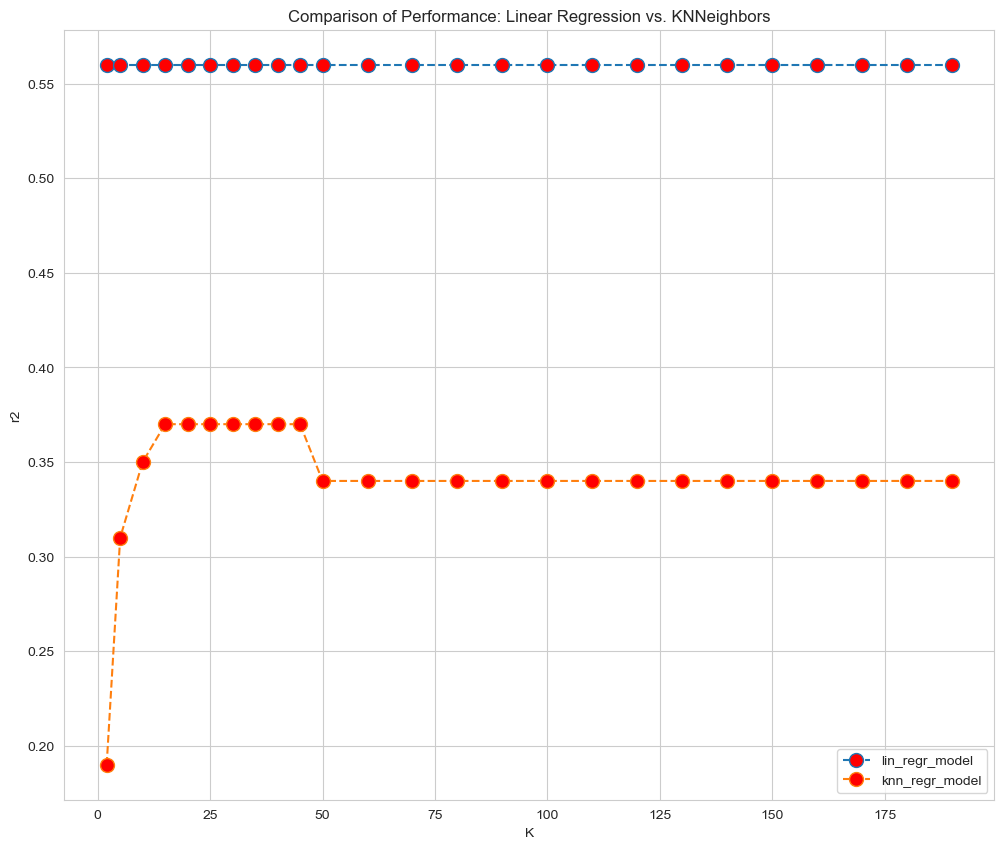

In [155]:
comp_models(range(2,200))

#### Interestingly enough, the linear regression model performs much better than the KNN regression model for all possible values of K. Additionally, as can be deducted from the graph above, the r2 values for KNNeighbors eventually reach a plateau around 0.36, beyond which no matter how much the K value changes it remains the same.

### 5. MLPregressor

In [90]:
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)


MLPRegressor()

In [91]:
pred_mlp = mlp_model.predict(X_test)

In [92]:
pred_mlp = pd.DataFrame(pred_mlp)

In [93]:
round(r2_score(y_test, pred_mlp), 2)

0.59

#### The MLPRegressor has provided the highest r2 score up to this point (0.64), provided that the test sample for the Regression is 30% of the rows